In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt
from scipy.integrate import quad
from math import pi
plt.style.use("ggplot")

In [2]:
# PARAMETERS
α = 1./3
t= 1./2
β = 3./5
ck= 1./25
πa = 1./25
y1 = 8.
y2 = 5.
xs = np.linspace(0,9,40) #the range you should plot

# 3 (open city)

In [3]:
# 3 (open city)
ū1 = 5
ū2 = 2.8
class Group:
    def __init__(self,y,ū,):
        self.y = y
        self.ū = ū
    
    def p̄(self,x):
        return α*((1-α)**(1-α) * (self.y-t*x)/self.ū)**(1./α)
    
    def s̄(self,x):
        return α*(self.y-t*x)/self.p̄(x)

def fixPlot():#this is a function for formatting the plot to be called after data is added
    plt.legend();plt.ylim(0,plt.ylim()[1]);plt.xlim(0,plt.xlim()[1]);plt.xlabel("x"); 

## 3(a)

the lower income group 2 lives closer to the city center.


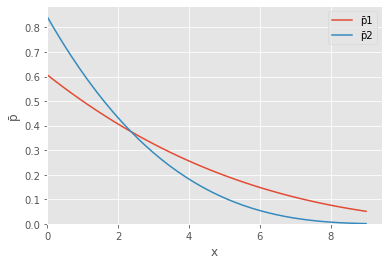

In [4]:
g1,g2 = Group(y=y1,ū=ū1),Group(y=y2,ū=ū2)
plt.plot(xs,g1.p̄(xs),label='p̄1')
plt.plot(xs,g2.p̄(xs),label='p̄2')
fixPlot()
plt.ylabel("p̄")
print("the lower income group 2 lives closer to the city center.")

## 3(b)

Text(0, 0.5, 'unit area')

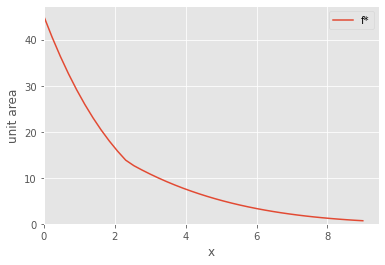

In [5]:
fstar = lambda p: (β*p/ck)**(β/(1-β)) #fstar of p
P̄ = np.vectorize(lambda x: g1.p̄(x) if g1.p̄(x) > g2.p̄(x) else g2.p̄(x)) #upper envelope
plt.plot(xs,fstar(P̄(xs)),label='f*')
fixPlot()
plt.ylabel("unit area")

## 3(c)

In [6]:
πstar = lambda p: p*fstar(p) - ck*fstar(p)**(1/β)
xa = opt.root(lambda xa: πstar(g1.p̄(xa))-πa, x0=6.5).x[0] #since i know that this group lives further out
xdiv = opt.root(lambda x: g1.p̄(x)-g2.p̄(x),x0=4).x[0]
N = lambda x0,x1,group: quad(\
                             lambda r: 2*pi*r*fstar(group.p̄(r))/group.s̄(r),x0,x1\
                            )[0] #passing it whatever group
N1 = N(xdiv,xa,g1)
N2 = N(0,xdiv,g2)
print("group 1's population will be {:.2f} and they live from {:.2f} to {:.2f}".format(N1,xdiv,xa))
print("group 2's population will be {:.2f} and they live from 0 to {:.2f}".format(N2,xdiv))

group 1's population will be 95.76 and they live from 2.36 to 7.91
group 2's population will be 142.16 and they live from 0 to 2.36


# 4  (closed city)

In [7]:
N0 = 100
def fun(ū):
    ū1,ū2 = ū
    g1,g2 = Group(y1,ū1),Group(y2,ū2)
    xa = opt.root(lambda xa: πstar(g1.p̄(xa))-πa, x0=6.5).x[0]
    xdiv = opt.root(lambda x: g1.p̄(x)-g2.p̄(x),x0=4).x[0]
    return np.array([
       N(0,xdiv,g2) - N0,
       N(xdiv,xa,g1) - N0
    ])
ū1,ū2 = opt.root(fun,x0=(4.8,2.7)).x
g1,g2 = Group(y1,ū1),Group(y2,ū2)
xa = opt.root(lambda xa: πstar(g1.p̄(xa))-πa, x0=6.5).x[0]
xdiv = opt.root(lambda x: g1.p̄(x)-g2.p̄(x),x0=4).x[0]
print("the utilities of groups 1 and 2 are, respectively, {:.2f} and {:.2f}".format(ū1,ū2))
print("group 2 lives from 0 to {:.2f}, and group 1 lives from {:.2f} to {:.2f}".format(xdiv,xdiv,xa))

the utilities of groups 1 and 2 are, respectively, 5.04 and 2.87
group 2 lives from 0 to 2.04, and group 1 lives from 2.04 to 7.85


# Hints
Here the functions just return 0 but if you fill them in then you'll do well.

In [8]:
# create a group
class Group:
    def __init__(self,y,ū,):
        self.y=y
        self.ū = ū
    
    def p̄(self,x):
        return 0
    
    def s̄(self,x):
        return 0

In [9]:
# first, note that you can include a one-line if/else in python like this
testFun = lambda a,b: a if (a>b) else -a 
print(testFun(6,7))
print(testFun(7,5))
#This is useful for creating functions that return, say, the equilibrium
#rent, unit size, density, floorspace built, population, land rent etc.
#Also, don't forget you can use functions inside each other, 
# and you can even pass functions as arguments to other functions

-6
7
